In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import tinyDA as tda

In [5]:
b = 1
m = 2
x = np.linspace(0,1)
y_pure = b + m*x

sigma = 0.1
y = y_pure + np.random.normal(scale=sigma, size=x.shape[0])

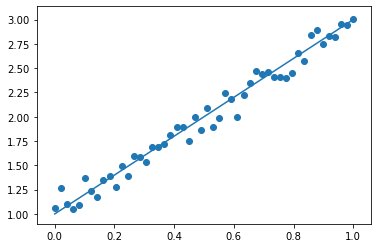

In [6]:
plt.plot(x, y_pure)
plt.scatter(x, y)
plt.show()

In [7]:
mean_prior = np.zeros(2)
cov_prior = np.eye(2)
cov_likelihood = sigma**2*np.eye(x.shape[0])

my_prior = multivariate_normal(mean_prior, cov_prior)
my_loglike = tda.LogLike(y, cov_likelihood)

In [8]:
class MyLinkFactory(tda.LinkFactory):
    def evaluate_model(self, parameters):
        output = parameters[0] + parameters[1]*x
        qoi = None
        return output, qoi

In [9]:
my_link_factory = MyLinkFactory(my_prior, my_loglike)

In [10]:
#rwmh_cov = np.eye(2)
#rmwh_scaling = 0.1
#rwmh_adaptive = True
#my_proposal = tda.GaussianRandomWalk(C=rwmh_cov, scaling=rmwh_scaling, adaptive=rwmh_adaptive)

#pcn_scaling = 0.1
#pcn_adaptive = True
#my_proposal = tda.CrankNicolson(scaling=pcn_scaling, adaptive=pcn_adaptive)

#am_cov = np.eye(2)
#am_t0 = 2000
#am_sd = 1
#am_epsilon = 1e-6
#my_proposal = tda.AdaptiveMetropolis(C0=am_cov, t0=am_t0, sd=am_sd, epsilon=am_epsilon)

dream_M0 = 1000
dream_delta = 1
dream_method = 'lhs'
dream_nCR = 3
dream_adaptive = True
my_proposal = tda.SingleDreamZ(dream_M0, delta=dream_delta, Z_method=dream_method, nCR=dream_nCR, adaptive=dream_adaptive)

/home/mikkel/OneDrive/Projects/tinyDA/git/tinyDA/proposal.py:367: UserWarning:  SingleDreamZ is an EXPERIMENTAL proposal, similar to the DREAM(ZS) algorithm (see e.g. Vrugt 2016), but using only a single chain.

  warnings.warn(' SingleDreamZ is an EXPERIMENTAL proposal, similar to the DREAM(ZS) algorithm (see e.g. Vrugt 2016), but using only a single chain.\n')


In [11]:
my_chain = tda.PopulationChain(my_link_factory, my_proposal)

2021-07-01 17:19:39,853	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


In [12]:
my_chain.sample(12000)

Running chains, α = ['1.00', '1.00']:   0%|          | 0/12000 [00:00<?, ?it/s]/home/mikkel/OneDrive/Projects/tinyDA/git/tinyDA/proposal.py:131: RuntimeWarning: overflow encountered in exp
  return np.exp(proposal_link.posterior - previous_link.posterior)
Running chains, α = ['0.26', '0.19']: 100%|██████████| 12000/12000 [00:48<00:00, 246.25it/s]


In [13]:
burnin = 2000

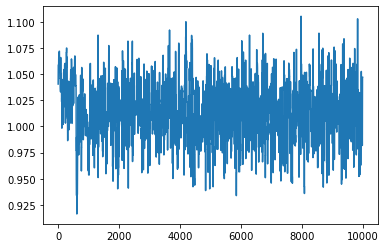

In [14]:
plt.plot([link.parameters[0] for link in my_chain.chains[0][burnin:]])

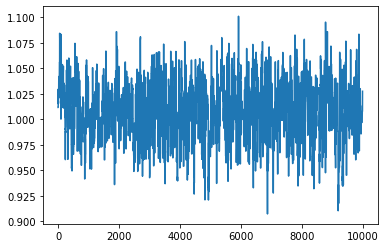

In [15]:
plt.plot([link.parameters[0] for link in my_chain.chains[1][burnin:]])

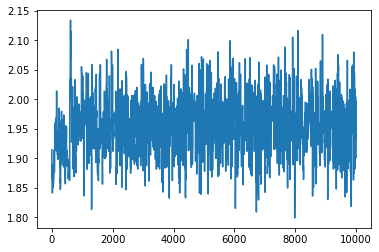

In [16]:
plt.plot([link.parameters[1] for link in my_chain.chains[0][burnin:]])

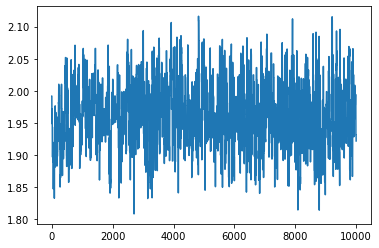

In [17]:
plt.plot([link.parameters[1] for link in my_chain.chains[1][burnin:]])